# Load Libraries

In [25]:
import tweepy
import re 
import pickle

In [26]:
from tweepy import OAuthHandler

# Initializing The Keys
### Please Replace With Your Own Keys

In [27]:
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO'
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret = 'ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'

# Authentication

In [28]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [29]:
args = ['facebook']
api = tweepy.API(auth,timeout=10)

# Fetch Data

In [30]:
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

# Load Classifier And TF-IDF Model

In [31]:
with open('clf.pickle','rb') as f:
	clf = pickle.load(f)
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)

In [32]:
total_pos = 0
total_neg = 0

# Preprocessing The Tweets

In [33]:
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," " ,tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," " ,tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," " ,tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"thats's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    #print(tweet)
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    print(tweet,": " ,sent)
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

 message from freedom fighter to our sohel taj  :  [1]
mission technology transfer organised workshop on intellectual property rights on at rgniipm nagpu  :  [1]
my answer to how do you have someone facebook  :  [0]
old dhaka foor barkhor khani nirob hotel beauty lassi hajir biriyani nanna biryani made it in this video thoug  :  [1]
best wishes on this wonderful journey at gania nayagarh  :  [1]
my page has unlimited space so please join me there rather requesting in my limited profile  :  [0]
 aiyshwaryam specially hyper active facebook user like this  :  [1]
celebrity entry performance  :  [1]
check it out dorjoy will logo resize for facebook google instagram for on fiverr  :  [0]
 posted new video to facebook  :  [0]
smile  :  [1]
this is definitely friendship destroyer boardkings  :  [1]
 posted new video to facebook  :  [0]
with sheetal jain ji long time associate to mr bachchan lover of shayari and good soul talking his  :  [1]
ami lal lal fiter lege kende chilam maa dj song yout

# # Visualizing the results

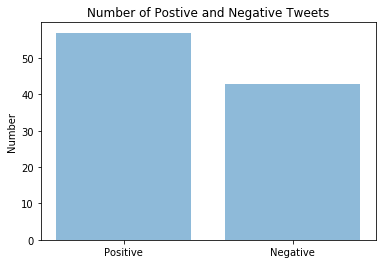

In [34]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')

plt.show()